In [54]:
import numpy as np
import scipy.io
from pathlib import Path
from kilosort.io import load_ops

# Define Path and Load Files
results_dir = Path('D:\\20241220\\kilosort4')
APtimestamps = np.load(r"D:\20241220\zarya20241220dots3DMP_APtimestamps.npy")
save_path = 'D:\zarya_20241220_unit.mat'

spike_clusters = np.load(results_dir / 'spike_clusters.npy')
spike_times = np.load(results_dir / 'spike_times.npy')
channel_positions = np.load(results_dir / 'channel_positions.npy')
channel_map =  np.load(results_dir / 'channel_map.npy')
templates =  np.load(results_dir / 'templates.npy')

In [55]:
chan_best = (templates**2).sum(axis=1).argmax(axis=-1)
chan_best = channel_map[chan_best]
template_amplitudes = ((templates**2).sum(axis=(-2,-1))**0.5)
uniq_spike_clusters = np.unique(spike_clusters)
spike_counts = np.unique(spike_clusters, return_counts=True)[1]
channel_y_positions = channel_positions[:, 1]
newtrial_frame = np.where(np.diff(APtimestamps) < -1) [0]

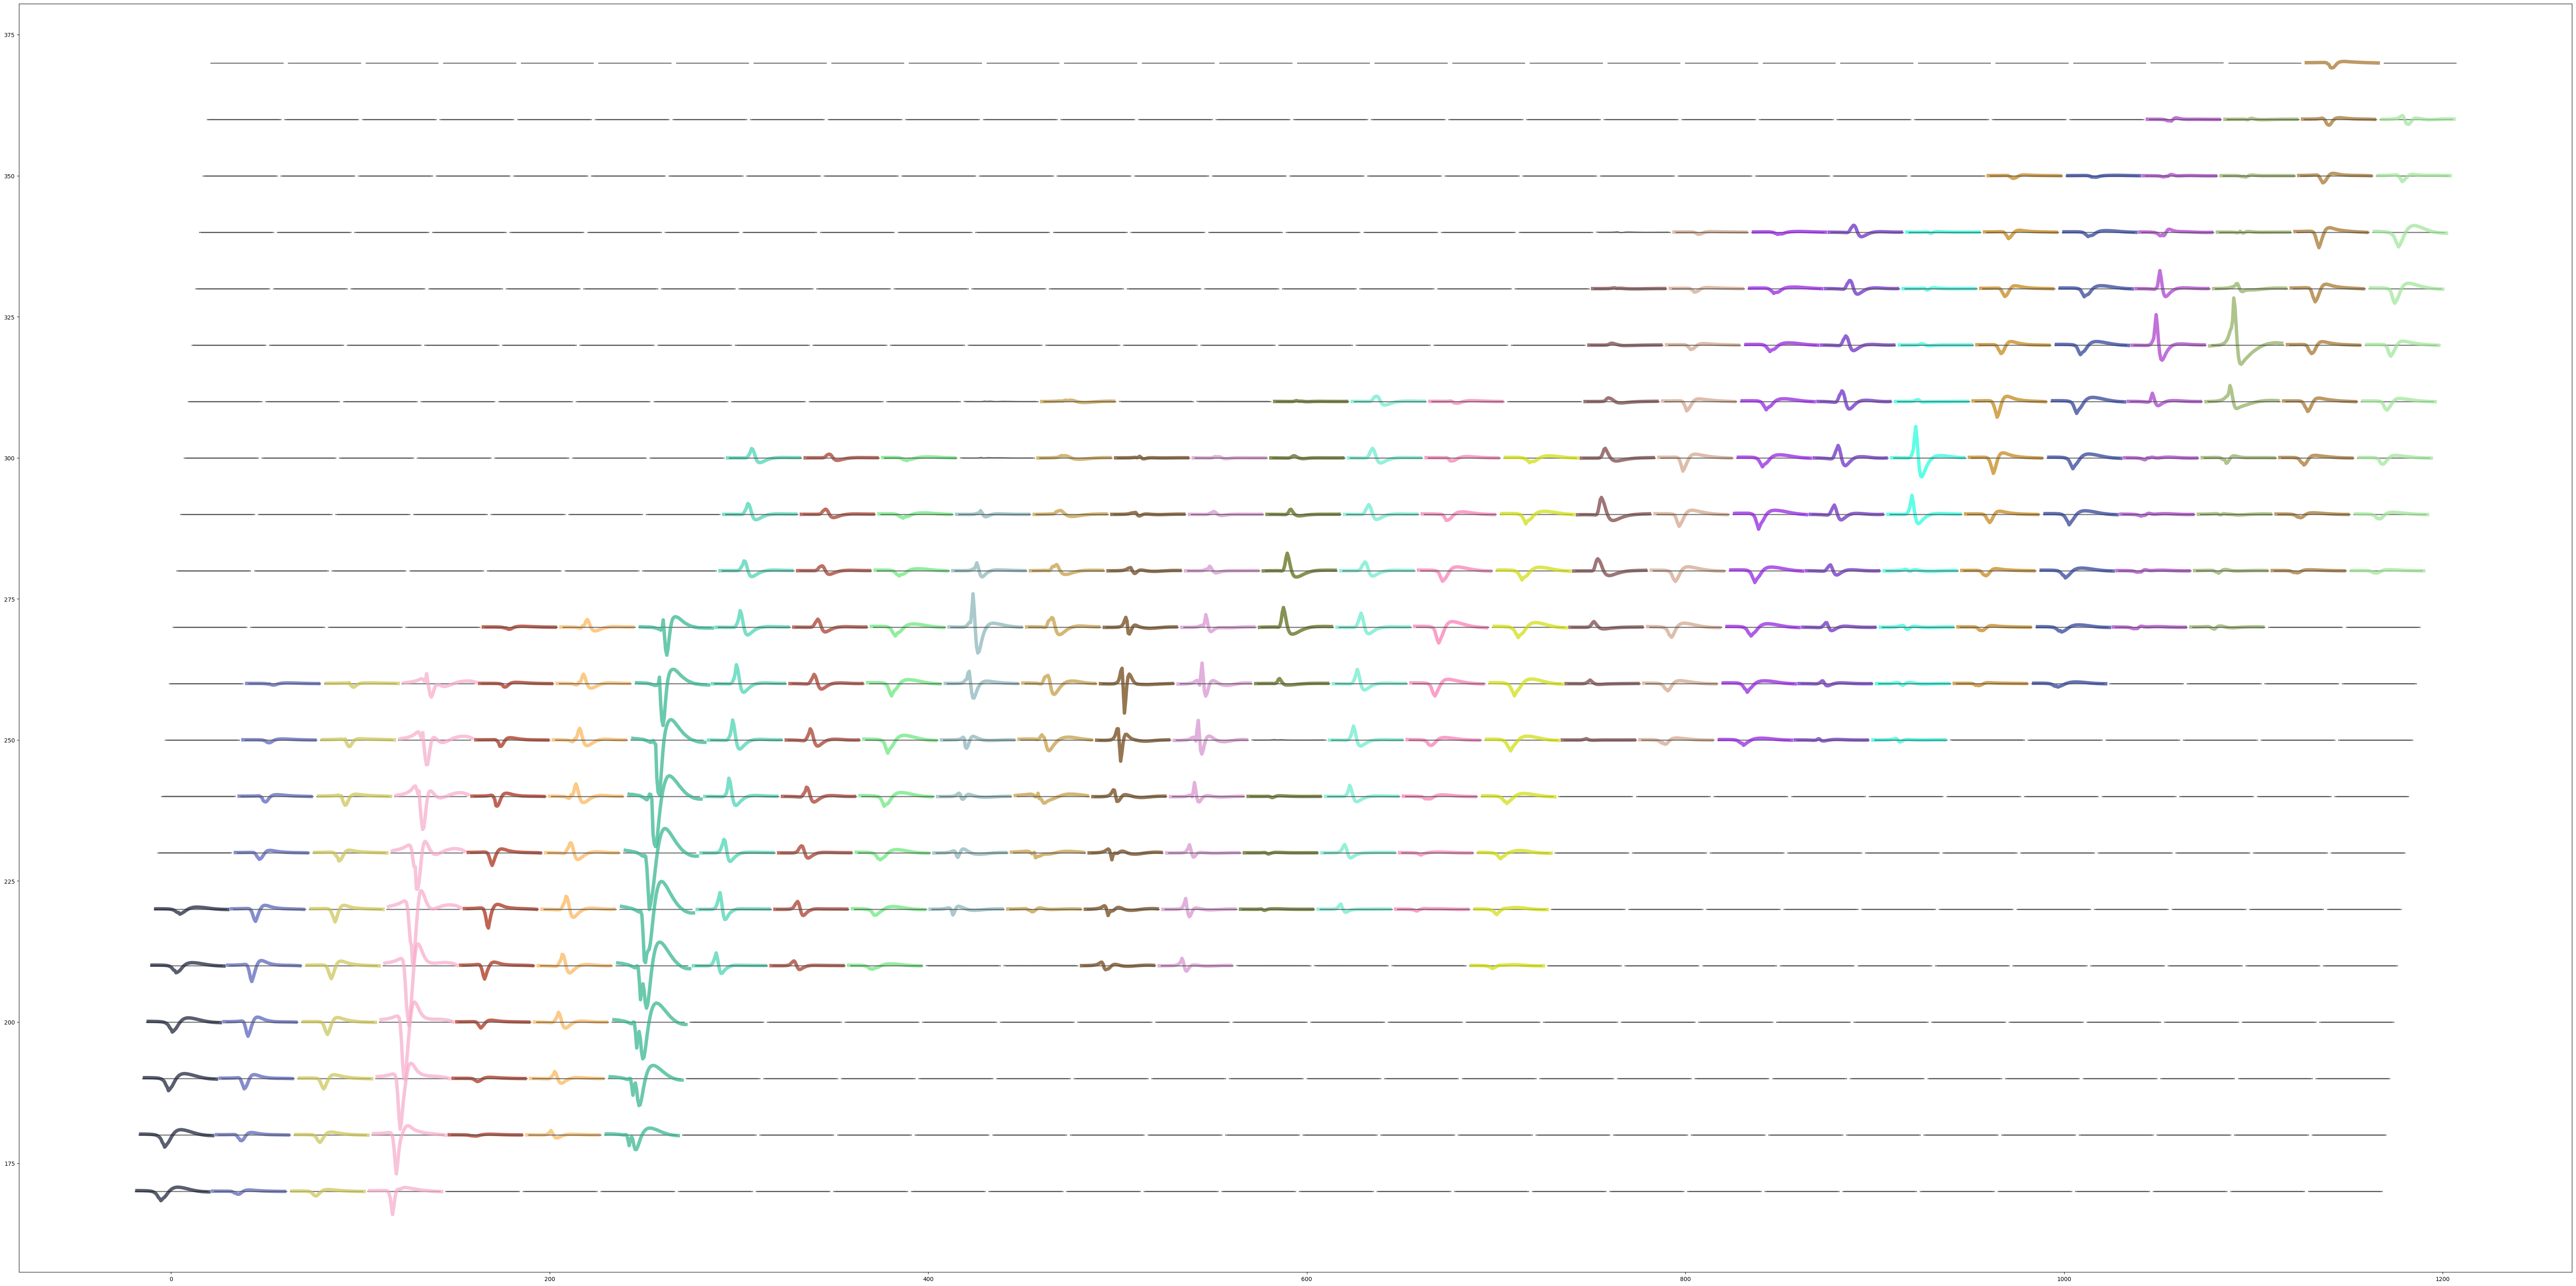

In [50]:
import numpy as np
import matplotlib.pyplot as plt

#  `templates` is  (735, 61, 384) matrix
ch_idx = np.arange(34, 75)
unit_idx = np.arange(80, 140)
channel_y_positions = channel_positions[:, 1]
plt.figure(figsize=(80, 40))
x_id = 0
for unit_id in unit_idx:
    random_color = np.random.rand(3,)
    if np.mean(templates[unit_id, :, ch_idx]) > 0:
    
        for ch_id in ch_idx:
            waveform = []
            waveform = templates[unit_id, :, ch_id]
            if np.abs(waveform).max() > 0.1:
                colorp = random_color
                width=6
            else:
                colorp = [0.3, 0.3, 0.3]
                width=2
                
            
            waveform = waveform + channel_y_positions[ch_id] /2
            x_pos = np.linspace(-19, 19, 61) + x_id  
            plt.plot(x_pos, waveform, color=colorp, linewidth=width, alpha=0.7)
            x_id += 1


# plt.xlabel("Unit Index")
# plt.ylabel("Amplitude")
# plt.title(f"Waveforms of All Units at Channel {ch_idx}")
plt.grid(False)
plt.savefig(r"\\172.30.3.33\homes\fetschlab\labMembers\Yueh-Chen\templates.png")
plt.show()

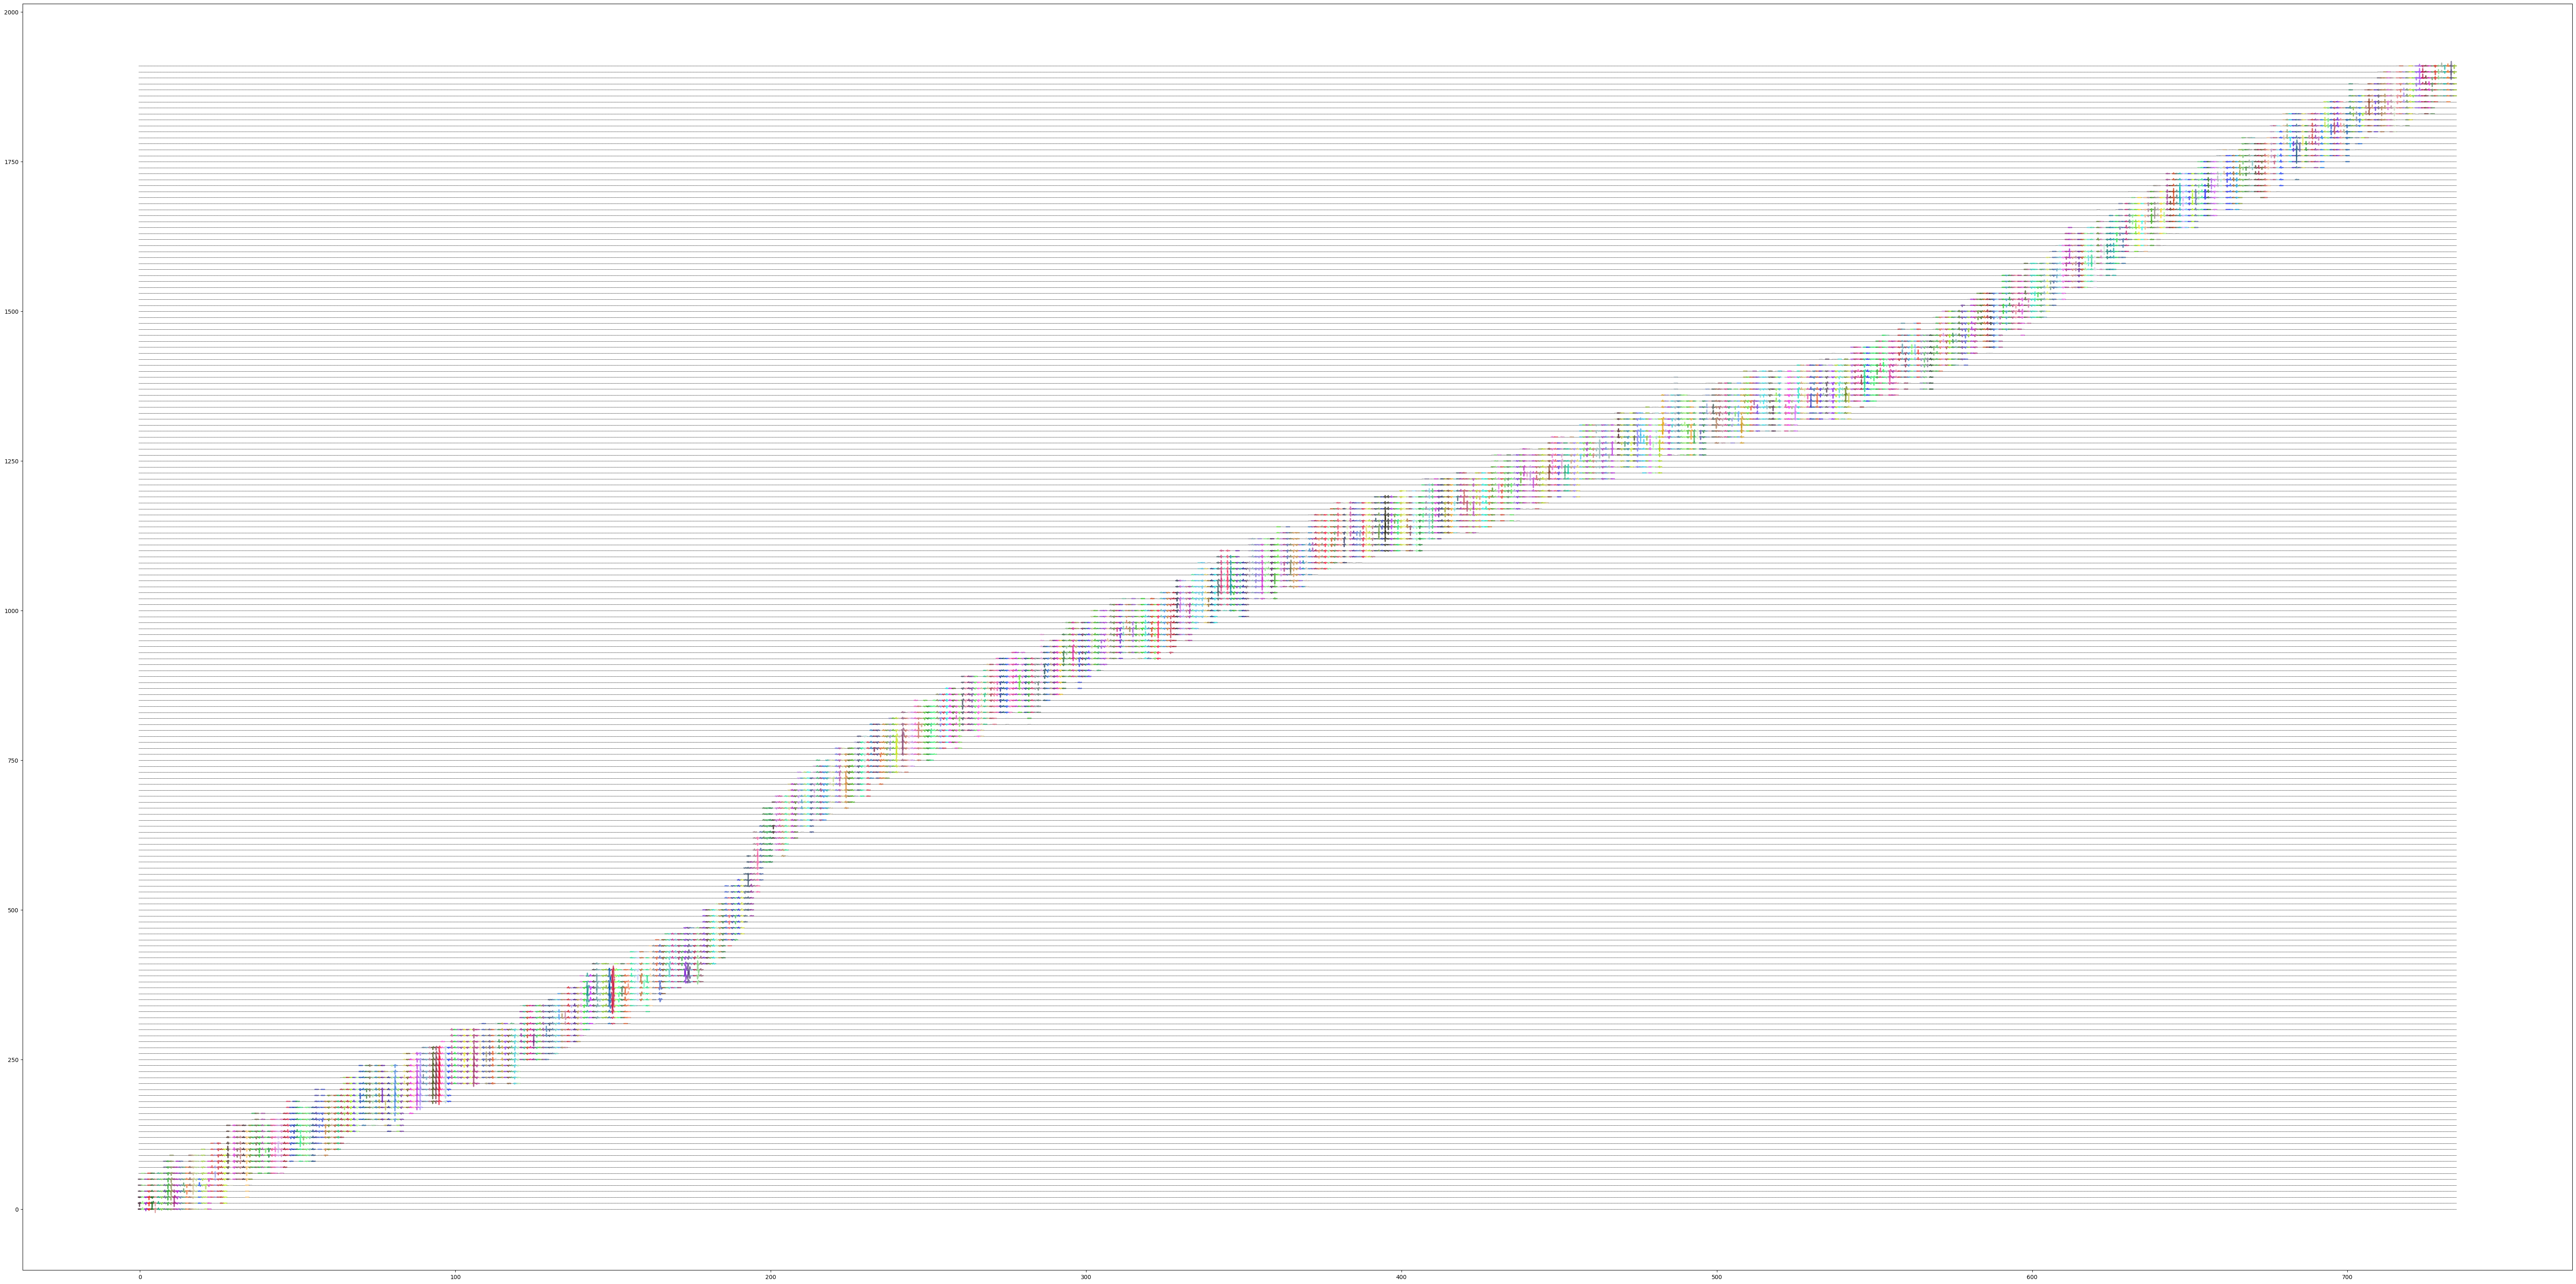

In [60]:
import numpy as np
import matplotlib.pyplot as plt

#  `templates` is  (735, 61, 384) matrix
ch_idx = range(384)
unit_idx = range(735)
channel_y_positions = channel_positions[:, 1]
plt.figure(figsize=(80, 40))

for unit_id in unit_idx:
    random_color = np.random.rand(3,)
    
    for ch_id in ch_idx:
        waveform = []
        waveform = templates[unit_id, :, ch_id]
        if np.abs(waveform).max() > 0.1:
            colorp = random_color
            width=2
        else:
            colorp = [0.3, 0.3, 0.3]
            width=0.5
                
            
        waveform = waveform + channel_y_positions[ch_id] /2
        x_pos = np.linspace(-0.5, 0.5, 61) + unit_id  
        plt.plot(x_pos, waveform, color=colorp, linewidth=width, alpha=0.7)



# plt.xlabel("Unit Index")
# plt.ylabel("Amplitude")
# plt.title(f"Waveforms of All Units at Channel {ch_idx}")
plt.grid(False)
plt.savefig(r"\\172.30.3.33\homes\fetschlab\labMembers\Yueh-Chen\templates_all.png")
plt.show()